# Семинар 22. ООП

### Задание 0. Классы

Создать класс Point, от которого унаследован Shape, а от него - Circle и Square.

Point - точка на плоскости, отображаемая определенным маркером '.'.

Shape - абстрактная фигура, не имеющая формы, которая также отображается на графике маркером 'x'.

Circle и Square отображаются на графике в виде круга и квадрата заданных размеров.

Вся иерархия должна:
1. реализовывать метод draw(self), который отрисовывает объект при помощи matplotlib; [0.2]
2. (кроме Point) реализовывать метод is_inside(self, point), где point - объект класса Point. Метод проверяет, лежит ли точка внутри фигуры; [0.2]
3. создать несколько объектов классов Circle, Square, отрисовать и проверить несколько точек на принадлежность им; [0.2]
4. создать класс Union, унаследованный от Shape, являющий объединением фигур-наследников класса Shape из заданного списка, реализующий обе функции (draw, is_inside); [0.2]
5. создать класс Intersection, унаследованный от Shape, являющий пересечением фигур-наследников класса Shape из заданного списка, реализующий обе функции (draw, is_inside); [0.2]


In [10]:
import matplotlib.pyplot as plt

class Point:
    def __init__(self, x=0, y=0, style='.r'):
        self.x = x
        self.y = y
        self.style = style
        
    def draw(self, ax=None):
        ax_ = ax if ax is not None else plt.gca()
        ax_.plot(self.x, self.y, self.style)
        return ax

In [11]:
class Shape(Point):
    
    def is_inside(self, point: Point):
        raise NotImplementedError()

In [55]:
class Circle(Shape):
    def __init__(self, x=0, y=0, r=1, color=(1, 0, 0, 1)):
        super().__init__(x, y)
        self.color = color
        self.r = r
        
    def draw(self, ax=None):
        ax_ = ax if ax is not None else plt.gca()
        circle = plt.Circle((self.x, self.y), self.r, color=self.color)
        ax_.add_patch(circle)
        return ax
    
    def is_inside(self, point):
        if isinstance(point, Point):
            dx = point.x - self.x
            dy = point.y - self.y
            return dx**2 + dy**2 < self.r**2
        else:      
            dxy = point - np.array([self.x, self.y])
            return np.sum(dxy**2, axis=1) < self.r**2

In [60]:
class Union(Shape):
    def __init__(self, *shapes):
        self.shapes = shapes
        
    def draw(self, ax=None):
        for shape in self.shapes:
            shape.draw(ax)
        return ax
    
    def is_inside(self, point: Point):
        if isinstance(point, Point):
            for shape in self.shapes:
                f = shape.is_inside(point)
                if f: 
                    return True
            return False
        else:
            mask = np.zeros_like(point[:, 0], dtype=bool)
            for shape in self.shapes:
                f = shape.is_inside(point)
                mask = mask | f
            return mask

In [69]:
class Intersection(Shape):
    def __init__(self, *shapes):
        self.shapes = shapes
        
    def draw(self, ax=None):
        for shape in self.shapes:
            shape.draw(ax)
        return ax
    
    def is_inside(self, point: Point):
        if isinstance(point, Point):
            for shape in self.shapes:
                f = shape.is_inside(point)
                if f: 
                    return True
            return False
        else:
            mask = np.ones_like(point[:, 0], dtype=bool)
            for shape in self.shapes:
                f = shape.is_inside(point)
                mask = mask & f
            return mask

True

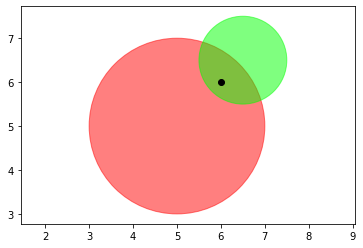

In [61]:
plt.xlim([0, 10])
plt.ylim([0, 10])
c1 = Circle(5, 5, 2, color=(1, 0, 0, 0.5))
c2 = Circle(6.5, 6.5, 1, color=(0, 1, 0, 0.5))
p = Point(6, 6, 'ok')
u = Union(c1, c2)
u.draw()
p.draw()
plt.axis('equal')
u.is_inside(p)

In [62]:
import numpy as np

In [71]:
Y, X = np.mgrid[0:10:51j, 0:10:51j]
pts = np.column_stack((X.flatten(), Y.flatten()))
pts.shape

(2601, 2)

(-0.5, 10.5, -0.5, 10.5)

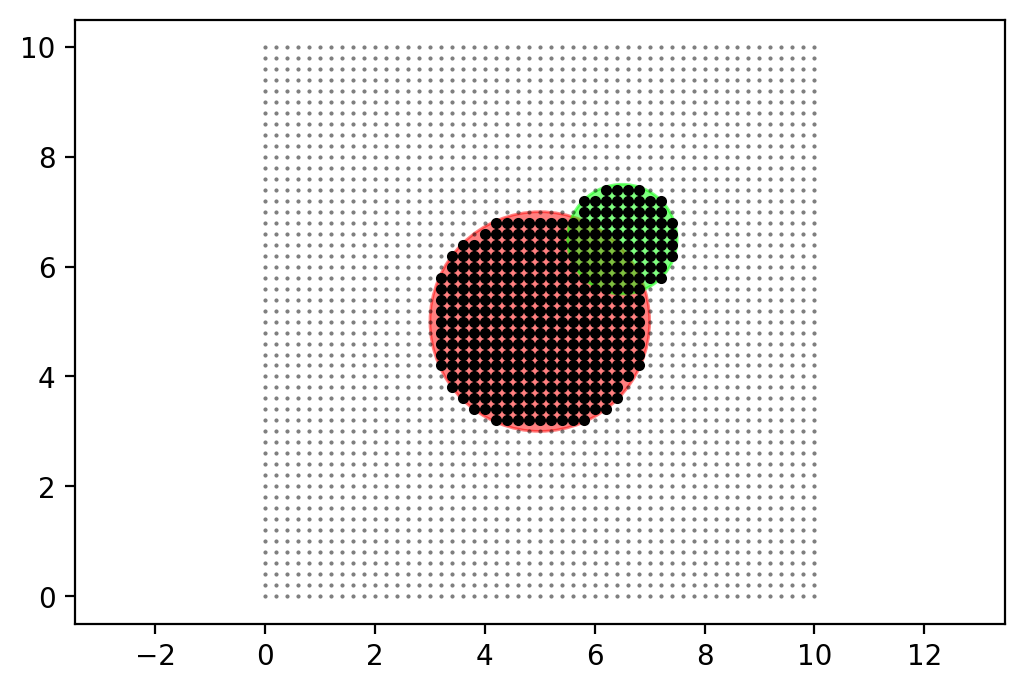

In [76]:
plt.figure(dpi=200)
u = Union(c1, c2)
mask = u.is_inside(pts)
nmask = np.logical_not(mask)
u.draw()
plt.plot(pts[mask, 0], pts[mask, 1], '.k')
plt.plot(pts[nmask, 0], pts[nmask, 1], '.k', alpha=0.5, ms=1)
plt.axis('equal')

In [7]:
Shape().is_inside(Point())

NotImplementedError: 

### Задание 1. Декораторы

Исключения в Python бывают разных типов: ValueError, TypeError, RuntimeError и др.
Все исключения унаследованы от класса BaseException.

Для того, чтобы поймать и корректно обработать исключение, нужно код, который потенциально может его вызвать, поместить в блок try ... except
```

try:
    # do something that should raise exception
except тип_исключения as e:
    # do something with exception

```

При возникновении исключения в коде между try и except, когда тип исключения совпадает или является наследником 'тип_исключения', то управление передается в блок except.

Требуется:
1. написать декоратор, который будет выводить на экран и в файл 'log.txt' в режиме дополнения информацию о возникновении или не возникновении исключений в декорируемой функции.
2. протестировать декоратор нарочно вызывая исключения в декорируемой функции при помощи raise. Например:

```
raise ValueError("В функцию передано некорректное значение")
raise TypeError("Тип аргумента функции не поддерживается")
и др.
```


In [85]:
def logging(func):
    """
    Декоратор, выводящий информацию о вызове функции в файл
    """
    def logging_wrapper(*args, **kwargs):
        with open('log.txt', 'at') as f:
            try:
                res = func(*args, **kwargs)
                f.write('%r %r %r\n'%(func.__name__, args, kwargs))
            except Exception as e:
                f.write('EXCEPTION: %r, FUNC: %r %r %r\n'%(e, func.__name__, args, kwargs))
                return None
        return res
    return logging_wrapper

In [86]:
@logging
def superfunc(a, b):
    return a / b

In [87]:
superfunc(1, 0)

In [88]:
!TYPE log.txt

'my_func' (1, 2) {}
'my_func' (1, 2) {}
'counter_wrapper' (0, 0) {}
'counter_wrapper' (1, 2) {}
'counter_wrapper' (2, 4) {}
'counter_wrapper' (3, 6) {}
'counter_wrapper' (4, 8) {}
'superfunc' (1, 2) {}
EXCEPTION: ZeroDivisionError('division by zero'), FUNC: 'superfunc' (1, 0) {}
